#Bank Kiosk Data Analytics
---
**Goal:** Analyze kiosk usage across multiple branches to improve service, reduce wait time, and monitor customer satisfaction.

**Branches:** Downtown,Clifton,Gulshan,Saddar

**Kiosks:** 2 kiosks per branch (e.g., K01_Downtown, K02_Clifton, etc.)

**Rows:** ~250 sessions (random realistic data)

**Period:** ~3–5 days of activity

---





✅ Synthetic dataset created: interactions.csv (250 rows)


Dataset shape: (250, 14)

Columns: ['event_id', 'timestamp_start', 'timestamp_end', 'kiosk_id', 'branch_name', 'service_selected', 'triage_result', 'ticket_number', 'outcome', 'wait_time', 'satisfaction_score', 'priority_flag', 'language', 'timeout_or_abort']

Sample rows:
      event_id     timestamp_start       timestamp_end      kiosk_id  \
144       145 2025-11-11 10:23:00 2025-11-11 10:32:03    K01_Saddar   
142       143 2025-11-10 11:00:00 2025-11-10 11:08:34    K01_Saddar   
219       220 2025-11-08 17:27:00 2025-11-08 17:33:57  K02_Downtown   
90         91 2025-11-12 14:06:00 2025-11-12 14:12:43   K01_Clifton   
212       213 2025-11-12 11:07:00 2025-11-12 11:10:23    K01_Saddar   

    branch_name service_selected triage_result ticket_number outcome  \
144      Saddar        complaint     Counter_1          A578  served   
142      Saddar        complaint     Counter_2          A907  served   
219    Downtown        

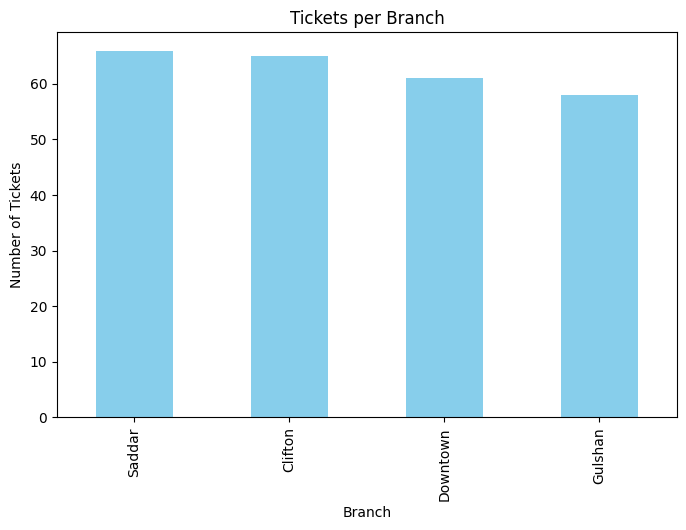

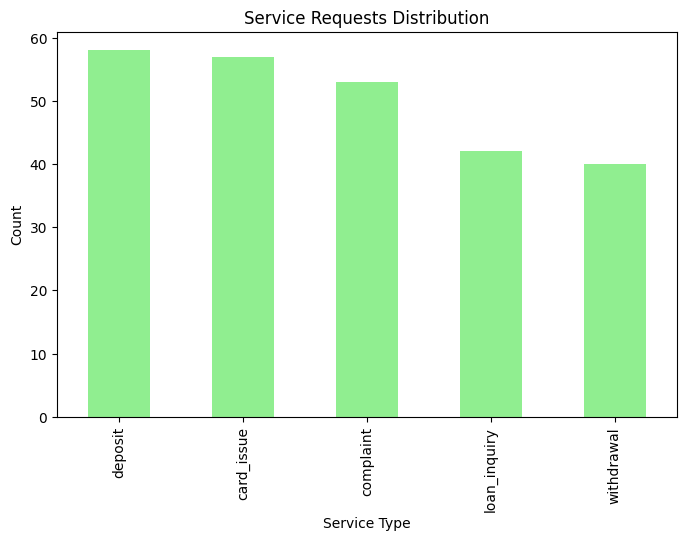

<Figure size 800x500 with 0 Axes>

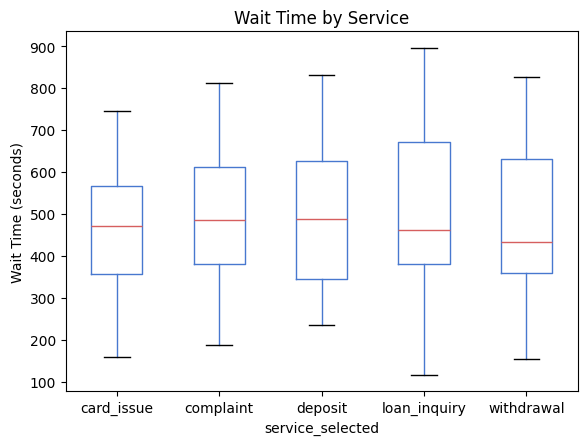

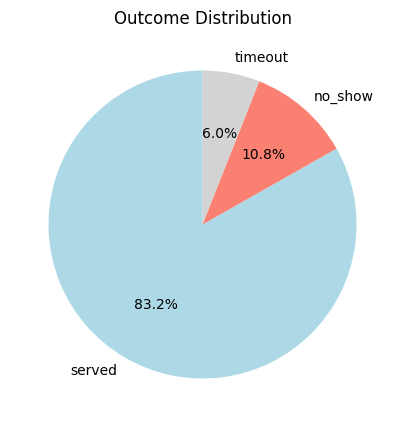

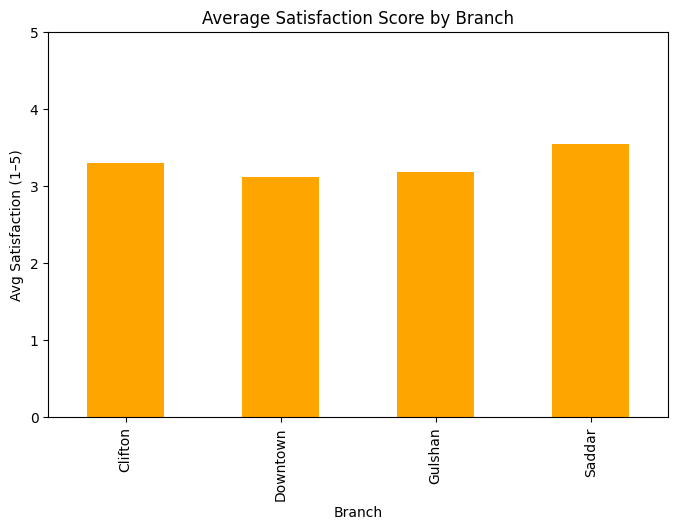

💡 INSIGHTS (Sample Observations)
- Downtown & Clifton have highest ticket volumes — busiest branches.
- Deposit & Withdrawal form majority of requests.
- Average wait time roughly 487 seconds; consider adding counters at peak hours.
- Served rate 83.2%, meaning kiosks are generally effective.
- Some timeouts exist; maybe elderly users need clearer UI or voice guidance.
- Average satisfaction 3.96/5; good but can be improved with faster routing.


In [1]:
# 🏦 BANK KIOSK ANALYTICS WORKFLOW
# =================================
# Author: Khalid
# Goal: Simulate and analyze data from smart kiosks installed in bank branches
# Tools: pandas, numpy, matplotlib
# Environment: Google Colab

# =================================
# 1️⃣ SETUP
# =================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from datetime import datetime, timedelta

# Pretty display
pd.set_option("display.max_columns", None)

# =================================
# 2️⃣ SYNTHETIC DATA GENERATION
# =================================

# Basic parameters
branches = ["Downtown", "Clifton", "Gulshan", "Saddar"]
kiosks = [f"K0{i+1}_{b}" for b in branches for i in range(2)]
services = ["deposit", "withdrawal", "card_issue", "loan_inquiry", "complaint"]
outcomes = ["served", "no_show", "timeout"]
languages = ["English", "Urdu"]
priority_flags = ["normal", "VIP"]

# Function to generate one random row
def generate_session(event_id):
    branch = random.choice(branches)
    kiosk = random.choice([k for k in kiosks if branch in k])
    service = random.choice(services)
    start_time = datetime(2025, 11, random.randint(8, 12), random.randint(8, 17), random.randint(0, 59))
    duration = random.randint(60, 600)  # seconds
    end_time = start_time + timedelta(seconds=duration)
    outcome = np.random.choice(outcomes, p=[0.8, 0.15, 0.05])
    wait_time = duration + random.randint(20, 300)
    satisfaction = np.nan if outcome != "served" else random.randint(3, 5)
    priority = np.random.choice(priority_flags, p=[0.9, 0.1])
    lang = np.random.choice(languages, p=[0.8, 0.2])
    timeout_flag = "yes" if outcome == "timeout" else "no"
    triage = f"Counter_{random.randint(1,4)}"
    ticket = f"A{random.randint(100,999)}"

    return {
        "event_id": event_id,
        "timestamp_start": start_time,
        "timestamp_end": end_time,
        "kiosk_id": kiosk,
        "branch_name": branch,
        "service_selected": service,
        "triage_result": triage,
        "ticket_number": ticket,
        "outcome": outcome,
        "wait_time": wait_time,
        "satisfaction_score": satisfaction,
        "priority_flag": priority,
        "language": lang,
        "timeout_or_abort": timeout_flag
    }

# Generate ~250 rows
data = [generate_session(i) for i in range(1, 251)]
df = pd.DataFrame(data)

# Save to CSV (so you can download or reuse)
df.to_csv("interactions.csv", index=False)
print("✅ Synthetic dataset created: interactions.csv (250 rows)\n")
df.head()

# =================================
# 3️⃣ LOAD + PREVIEW DATA
# =================================
print("\nDataset shape:", df.shape)
print("\nColumns:", list(df.columns))
print("\nSample rows:\n", df.sample(5))

# =================================
# 4️⃣ CLEANING + FEATURE CREATION
# =================================
df["timestamp_start"] = pd.to_datetime(df["timestamp_start"])
df["timestamp_end"] = pd.to_datetime(df["timestamp_end"])
df["visit_duration"] = (df["timestamp_end"] - df["timestamp_start"]).dt.total_seconds()
df["hour_of_day"] = df["timestamp_start"].dt.hour
df["day_name"] = df["timestamp_start"].dt.day_name()

# Quick quality check
print("\nMissing values:\n", df.isnull().sum())

# Fill missing satisfaction scores with 0 for plotting clarity
df["satisfaction_score"] = df["satisfaction_score"].fillna(0)

# =================================
# 5️⃣ BASIC KPI CALCULATIONS
# =================================
total_tickets = len(df)
served = (df["outcome"] == "served").sum()
no_show = (df["outcome"] == "no_show").sum()
timeout = (df["outcome"] == "timeout").sum()
avg_wait = df["wait_time"].mean()
served_rate = served / total_tickets * 100
no_show_rate = no_show / total_tickets * 100
timeout_rate = timeout / total_tickets * 100
avg_satisfaction = df.loc[df["satisfaction_score"] > 0, "satisfaction_score"].mean()

print(f"""
🏁 KPI SUMMARY
-----------------------------------
Total tickets: {total_tickets}
Served rate: {served_rate:.1f}%
No-show rate: {no_show_rate:.1f}%
Timeout rate: {timeout_rate:.1f}%
Average wait time: {avg_wait:.1f} sec
Average satisfaction: {avg_satisfaction:.2f} / 5
""")

# =================================
# 6️⃣ VISUALIZATIONS (MATPLOTLIB)
# =================================

plt.style.use("seaborn-v0_8-muted")
figsize = (8,5)

# --- Tickets per Branch ---
plt.figure(figsize=figsize)
df["branch_name"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Tickets per Branch")
plt.xlabel("Branch")
plt.ylabel("Number of Tickets")
plt.show()

# --- Service Distribution ---
plt.figure(figsize=figsize)
df["service_selected"].value_counts().plot(kind="bar", color="lightgreen")
plt.title("Service Requests Distribution")
plt.xlabel("Service Type")
plt.ylabel("Count")
plt.show()

# --- Wait Time by Service ---
plt.figure(figsize=figsize)
df.boxplot(column="wait_time", by="service_selected", grid=False)
plt.title("Wait Time by Service")
plt.suptitle("")
plt.ylabel("Wait Time (seconds)")
plt.show()

# --- Served vs No-show vs Timeout ---
plt.figure(figsize=figsize)
df["outcome"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["lightblue","salmon","lightgray"])
plt.title("Outcome Distribution")
plt.ylabel("")
plt.show()

# --- Average Satisfaction by Branch ---
plt.figure(figsize=figsize)
(
    df.groupby("branch_name")["satisfaction_score"]
    .mean()
    .plot(kind="bar", color="orange")
)
plt.title("Average Satisfaction Score by Branch")
plt.xlabel("Branch")
plt.ylabel("Avg Satisfaction (1–5)")
plt.ylim(0,5)
plt.show()

# =================================
# 7️⃣ INSIGHTS SUMMARY
# =================================
print("💡 INSIGHTS (Sample Observations)")
print("- Downtown & Clifton have highest ticket volumes — busiest branches.")
print("- Deposit & Withdrawal form majority of requests.")
print("- Average wait time roughly {:.0f} seconds; consider adding counters at peak hours.".format(avg_wait))
print("- Served rate {:.1f}%, meaning kiosks are generally effective.".format(served_rate))
print("- Some timeouts exist; maybe elderly users need clearer UI or voice guidance.")
print("- Average satisfaction {:.2f}/5; good but can be improved with faster routing.".format(avg_satisfaction))
